# Infos sur la photométrie 

- auteur : Sylvie Dagoret-Campagne
- date de creation : 3 février 2021
- affiliation : IJCLab/IN2P3/CNRS

- https://docs.astropy.org/en/stable/units/

- https://docs.astropy.org/en/stable/constants/

- https://docs.astropy.org/en/stable/units/equivalencies.html

- https://learn.astropy.org/tutorials.html

- https://learn.astropy.org/rst-tutorials/UVES.html?highlight=filtertutorials

- https://docs.astropy.org/en/stable/cosmology/

## Import


In [1]:
from astropy import constants as const

In [2]:
#from astropy import physical_constants, astronomical_constants

In [3]:
from astropy import units as u

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Flux


Par définition le flux de réference donnant une magnitude AB nulle est
$$
F_{ref} = 3631.1 Jy 
$$

avec
$$
1 Jy = 10^{-26} W.Hz^{-1}.m^{-2} = 10^{-23}.erg.cm^{-2} s^{-1} . Hz^{-1}
$$

## Flux de référence

In [5]:
Fref=3631.1 * u.Jy

In [6]:
target_flux = Fref

In [7]:
zero_point_star_equiv = u.zero_point_flux(3631.1 * u.Jy)

In [8]:
zero_point_star_equiv

[(Unit("mgy"), Unit("3631.1 Jy"))]

https://docs.astropy.org/en/stable/units/equivalencies.html

In [9]:
Fref.to(u.W / (u.m)**2 / u.Hz,equivalencies=u.spectral_density(550 * u.nm))  

<Quantity 3.6311e-23 W / (Hz m2)>

In [10]:
Fref.to(u.W / (u.m)**2 / u.Hz,equivalencies=u.spectral_density(800 * u.nm))  

<Quantity 3.6311e-23 W / (Hz m2)>

In [11]:
# so zero magnitude by definition
u.Magnitude(target_flux.to(u.AB, zero_point_star_equiv))  

<Magnitude -9.55237213e-05 mag(AB)>

In [12]:
u.Magnitude(target_flux.to(u.AB, Fref))  

<Magnitude -9.55237213e-05 mag(AB)>

# Filtres

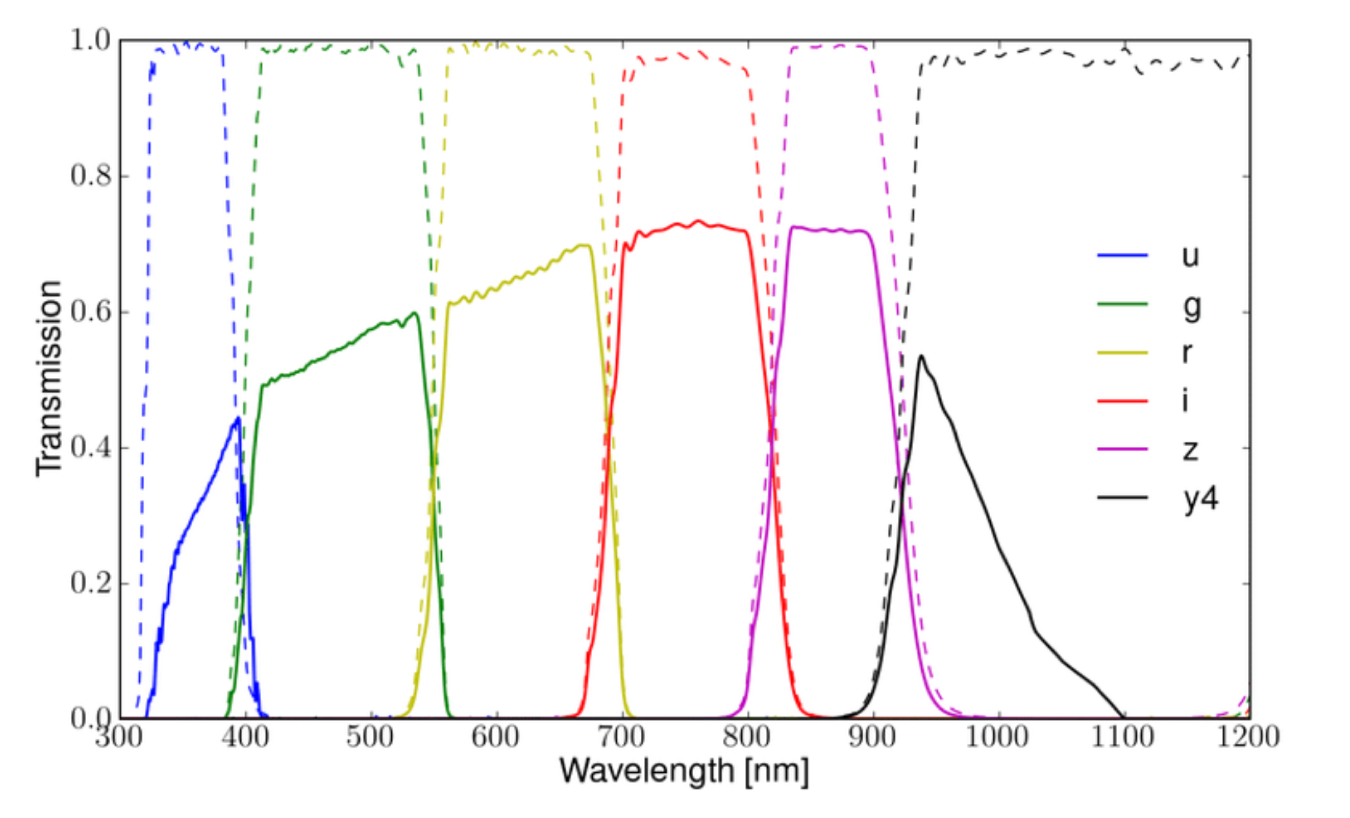

In [6]:
from IPython.display import display, Image
display(Image(filename='figures/filtreslsst.png'))

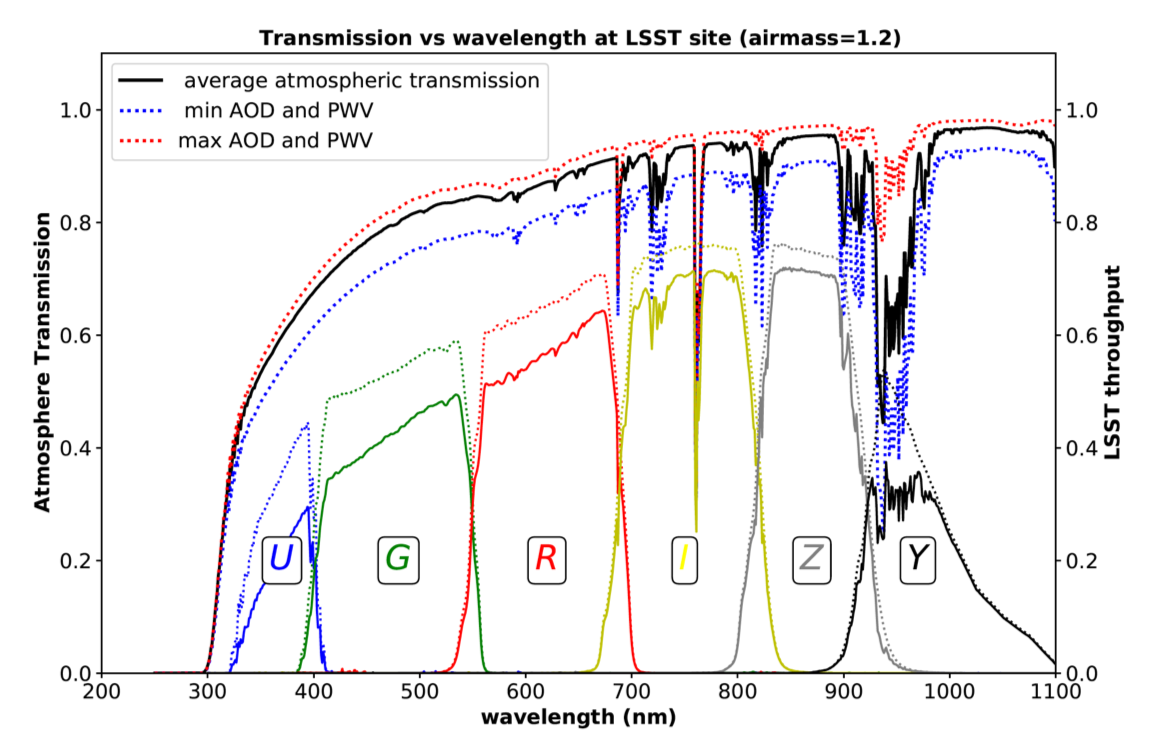

In [8]:
display(Image(filename='figures/atmospherelsst.png'))

# Flux

$$
C_b = \frac{S_{coll}.\Delta T}{g_{el} h} \int_0^\infty F_\nu(\lambda).S^{atm}(\lambda).S^{syst}_b(\lambda) \frac{d\lambda}{\lambda}
$$

- $C_b$ : taux ADU par seconde
- $S_{coll}$ : surface collectrice du telescope
- $\Delta T$ : temps d'exposition de l'observation
- $F_\nu(\lambda)$ : flux spécifique en $W/Hz/m^2$ de la source au dessus de l'atmosphère
- $S^{atm}(\lambda)$ : transmission de l'atmosphère, variable dans le temps et selon l'inclaison de l'observation
- $S^{syst}_b(\lambda)$ : transmission du télescope (transmission des mirroirs, transmission des lentilles correctrices, efficacité quantique du CCD (du photon au photoelectron) dans une bande passante $b$ à support limité en fréquence


Notons que le flux est souvent exprimé en Jansky, une unité non SI:

$
1 Jy = 10^{-26} W/Hz/m^2 = 10^{-23} erg/cm^2/s/Hz
$

## Constantes

En unités ADU/s

$$
C = \frac{\pi D^2 \Delta t}{4 g_{el} h}
$$

In [13]:
D=6.5*u.m # diametre du telescope
Dt=30*u.s # durée de l'exposition par image
gel=1.    # nombre de photoelectron par ADU

In [14]:
C = np.pi*D**2*Dt/4/const.h/gel

In [15]:
C

<Quantity 1.50238701e+36 m2 / J>

In [16]:
C.decompose()

<Quantity 1.50238701e+36 s2 / kg>

## Définition  du flux de référence pour la magnitude AB
$$
F_\nu(\lambda) = F_0 . f_\nu(\lambda)
$$

avec

- $F_0$ : en W/Hz/$m^2$,

- $f_\nu(\lambda)$ : sans dimension



$$
m_{0}^{AB} = -2.5 \log_{10} \left( \frac{F_0}{3631 Jy}\right)
$$

$$
F_\nu(\lambda) = 3631 Jy \cdot 10^{-0.4 m_0^{AB}} \cdot f_\nu(\lambda)
$$

Pour une source de magnitude caractéristique de 25 mag:

$$
F_\nu(\lambda) =  3.63 10^{-13}{\rm W/Hz/m^2}\cdot 10^{0.4 (25-m_0^{AB})} \cdot f_\nu(\lambda)
$$


### Vérification dans s'embarrasser avec les unités:

- on se place dans le SI

In [17]:
# Conversion de 1Jy en W/Hz/m2 et on divise par 1O^0.4*25
# Calcul dans le SI
K0=3631.1*1e-26*np.power(10,-10.)
K0

3.6311e-33

In [18]:
# Pour une surface collectrice correspondant à D=6.5 m et Delta t = 30 sec
# K1 est le terme de photoelectrons produits par le CCD pendant Delta T= 30 secondes
# Calcul dans le SI
K1=K0*np.pi*6.5**2/4*30./6.626e-34
K1

5455.375228093965

### Vérification avec le SI

In [19]:
Cb0=C*Fref
Cb0

<Quantity 5.45531747e+39 Jy m2 / J>

In [20]:
Cb0.decompose()

<Quantity 5.45531747e+13>

In [21]:
C0=np.power(10,0.4*25)

In [22]:
Cb0.decompose()/C0

<Quantity 5455.3174722>

## Comptage dans l'instrument

- $C_b$ : nombre d'ADU (unités d'ADC)
- $N_{pe} = C_b . g_{el}$ : nombre de photoelectrons produits dans le CCD 

$$
C_b = \frac{5455}{g_{el}}. 10^{0.4(25-m_{AB}^b)}. \left( \frac{D}{6.5m} \right)^2 \left( \frac{\Delta t}{30 sec}\right) \int_0^\infty f_\nu(\lambda).S^{atm}(\lambda).S^{syst}_b(\lambda)\frac{d\lambda}{\lambda}
$$

### Point Zero

C'est la valeur de $C_b$ tel que $F_\nu(\lambda)= F_{ref}$, c'est-à-dire $f_\nu(\lambda)=1$, définissant la référence des magnitudes $m_{AB}^b=0$ pour la bande b considéré

$$
C_b^{PZ} = \frac{54550}{g_{el}}. \left( \frac{D}{6.5m} \right)^2 \left( \frac{\Delta t}{30 sec}\right) \int_0^\infty S^{atm}(\lambda).S^{syst}_b(\lambda)\frac{d\lambda}{\lambda}
$$

### Calibration

- On veut pouvoir calibrer les flux d'objets $\frac{\Delta F}{F} = 0.005$. 
- La suface de collection et $\Delta t$ ne sont pas connus au pourcent.
- Supposons que l'on dispose d'une étoile de référence $F_\nu(\lambda)=F_{ref}$.
- Alors on mesurerait directement $C_b^{PZ}$

$$
C_b = C_b^{PZ}. 10^{-0.4m_{AB}^b}\frac{ \int_0^\infty f_\nu(\lambda).S^{atm}(\lambda).S^{syst}_b(\lambda)\frac{d\lambda}{\lambda}}{\int_0^\infty S^{atm}(\lambda).S^{syst}_b(\lambda)\frac{d\lambda}{\lambda}}
$$

- supposons que l'on dispose d'un ensemble d'étoiles de calibration dont $f_\nu(\lambda)$ est connu et $m_{AB}^b$ est calculé.
- on mesure pour chacune de ces étoiles on mesure $C_b$.

- On estime $C_b^{PZ}$ dans chaque CCD.

$$
C_b^{PZ} = C_b. 10^{0.4m_{AB}^b}\frac{ \int_0^\infty .S^{atm}(\lambda).S^{syst}_b(\lambda)\frac{d\lambda}{\lambda}}{\int_0^\infty f_\nu(\lambda) S^{atm}(\lambda).S^{syst}_b(\lambda)\frac{d\lambda}{\lambda}}
$$

### Magnitude mesurée pour un objet quelconque (pas étoile de calibration)

- pour un objet quelconque comme une galaxie: 

$$
m_{AB} = - 2.5 \log_{10}C_b + 2.5 \log_{10} C_b^{PZ} + 2.5 \log_{10} \left( \frac{ \int_0^\infty f_\nu(\lambda).S^{atm}(\lambda).S^{syst}_b(\lambda)\frac{d\lambda}{\lambda}}{\int_0^\infty S^{atm}(\lambda).S^{syst}_b(\lambda)\frac{d\lambda}{\lambda}}\right)
$$

# Statistique de Photo-électron

https://docs.scipy.org/doc/scipy/reference/stats.html

- Le nombre moyen de photoélectrons du signal est:

$$N_{pe}  = C_b. g_{el}$$


- L'écart type du nombre de photoélectrons du signal est :

$$\sigma(N_{pe})  = \sqrt{C_b. g_{el}}$$



Mais quand on est proche du seuil de détection, il faut rajouter à $\sigma(N_{pe})$ la contribution du fond de ciel qui est un bruit.

In [16]:
from scipy.stats import stats
import matplotlib.pyplot as plt
%matplotlib inline

## Rappels de statistique

### Echantillonnage statistique d'une variable aléatoire $X$ 

- valeur moyenne expérimentale: $E(X) = \frac{\sum_i^{N} X_i}{N} = \overline{X}$
- variance expérimentale      : $VAR(X) = \frac{\sum_i^{N} (X_i-\overline{X})^2}{N}$
- écart type expérimental    : $\sigma(X) = \sqrt{VAR(X)}$


- covariance expérimentale : $cov(X,Y) = \frac{\sum_i^{N} (X_i-\overline{X})(Y_i-\overline{Y}) }{N}$

### $X$ variable aléatoire de densité de probabilité $dp=f(x)dx$

- valeur moyenne theorique: $E(X) = \int x.f(x) dx = \overline{x}$
- variance théorique      : $VAR(X) = \int (x-\overline{x})^2.f(x) dx$
- écart type theorique    : $\sigma(X) = \sqrt{VAR(X)}$

### Exemples de quelques distributions

### Uniform

- par exemple tirer uniformément $t_0$ sur 10 ans

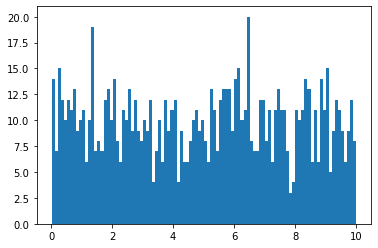

In [43]:
from scipy.stats import uniform
xmin=0
xmax=10.
N=1000
sample=uniform.rvs(xmin,xmax,N)

plt.hist(sample,bins=100);

### Gaussienne - normale

- par exemple erreur sur une variable continue

In [37]:
from scipy.stats import norm
mu=10
sigma=15.
N=1000

In [41]:
sample=norm.rvs(loc=mu,scale=sigma,size=N)

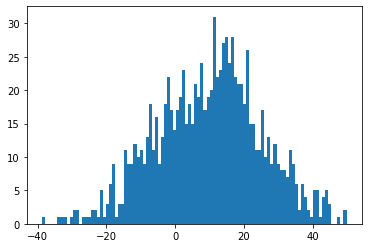

In [42]:
plt.hist(sample,bins=100);

### Loi de poisson (Comptage d'événements)


- $\lambda$ : valeur moyenne (théorique)

$$
P(N/\lambda) = \frac{\lambda^N}{N!}e^{-\lambda}
$$


-  $E(N) = \sum_{k=0}^\infty k.P(k/\lambda) = \lambda$
- $Var(N) = \sum_{k=0}^\infty (k-\lambda)^2.P(k/\lambda)  \lambda $
- $\sigma(N) = \sqrt{\lambda}$

La loi de poisson est adaptée aux comptage $N$ d'un nombre d'événements qui ne peut être que $N\ge 0$.

Par exemple :

- le nombre de photoélectrons d'une source sur le CCD,
- le nombre d'objets compacts massif détectés dans le Halo galactique


In [27]:
from scipy.stats import poisson

In [34]:
N0=5.5
N=1000
sample=poisson.rvs(mu=N0,size=N)

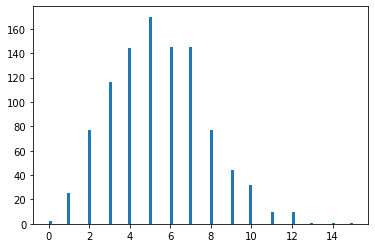

In [35]:
plt.hist(sample,bins=100);

In [49]:
N0=0.5
N=1000
sample=poisson.rvs(mu=N0,size=N)

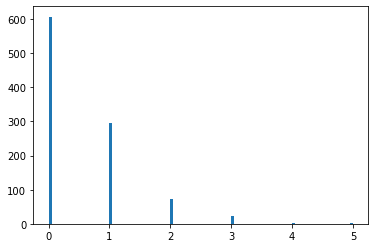

In [50]:
plt.hist(sample,bins=100);